In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
import json

scores = dict()
with open("scores.json", "r") as fi:
    scores = json.load(fi)

with open("scores2.json", "r") as fi:
    scores2 = json.load(fi)

In [3]:
thresholds = np.array(list(reversed(scores["roc"]["thresholds"])))
gar = np.array(list(reversed(scores["roc"]["gar"])))
far = np.array(list(reversed(scores["roc"]["far"])))
frr = 1 - gar
grr = 1 - far

gar2 = np.array(list(reversed(scores2["roc"]["gar"])))
far2 = np.array(list(reversed(scores2["roc"]["far"])))
frr2 = 1 - gar
grr2 = 1 - far

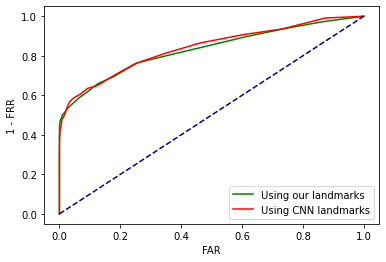

In [4]:
plt.plot(far, gar, label = "ROC curve", color='green')
plt.plot(far2, gar2, label = "ROC curve 2", color='red')
plt.plot([0,1], [0,1], label = "Not valid", color="navy", linestyle='--')
plt.xlabel("FAR") 
plt.ylabel("1 - FRR")
plt.legend(["Using our landmarks", "Using CNN landmarks"], loc=4)
_ = plt.show()

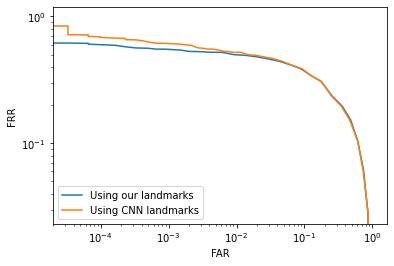

In [5]:
plt.plot(far, frr, label = "DET")
plt.plot(far2, frr2, label = "DET")
#plt.plot([1,0], [0,1], label = "Not valid")
#plt.title("DET curve") 
plt.xlabel("FAR") 
plt.ylabel("FRR") 
plt.yscale('log')
plt.xscale('log')
plt.legend(["Using our landmarks", "Using CNN landmarks"], loc=3)
#plt.legend(["DET"], loc=3)
_ = plt.show()

In [6]:
#equal error threshold

def eer_thr():
    x = 0
    err = 1
    for i in range(len(far)):
        if abs(far[i]-frr[i]) < err:
            x= i
            err = abs(far[i]-frr[i])
    return x
x = eer_thr()

def eer_thr2():
    x = 0
    err = 1
    for i in range(len(far2)):
        if abs(far2[i]-frr2[i]) < err:
            x= i
            err = abs(far2[i]-frr2[i])
    return x
x2 = eer_thr2()

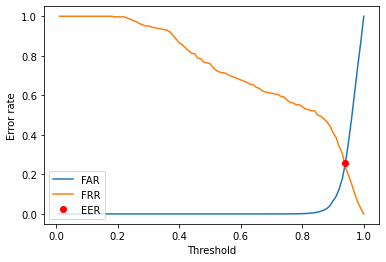

In [7]:
plt.plot(thresholds, far, label = "FAR" )
plt.plot(thresholds, frr, label = "FRR")
eer_thresh = eer_thr()
plt.plot(thresholds[eer_thresh], far[x], "ro")

plt.xlabel("Threshold") 
plt.ylabel("Error rate") 
#plt.title("EER") 
plt.legend(["FAR", "FRR", "EER"], loc=3)
_ = plt.show()

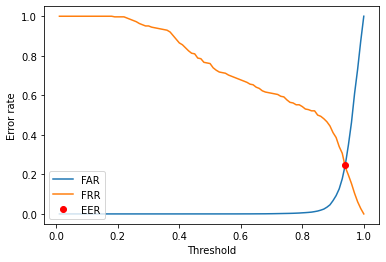

In [8]:
plt.plot(thresholds, far2, label = "FAR" )
plt.plot(thresholds, frr2, label = "FRR")
eer_thresh2 = eer_thr2()
plt.plot(thresholds[eer_thresh2], far2[x], "ro")
plt.xlabel("Threshold") 
plt.ylabel("Error rate") 
#plt.title("EER") 
plt.legend(["FAR", "FRR", "EER"], loc=3)
_ = plt.show()